In [ ]:
Project           : Strock prediction data analysis
Given data set    : stroke-data.csv
Data set algorithm: Classification algorithm

In [ ]:
#step1:importing library pandas to read dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
a=pd.read_csv("stroke-data.csv")
a

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
a.drop(['id'],axis=1,inplace=True)

In [ ]:
#step:2
#Use label encoding to remove categorical

In [3]:
from sklearn.preprocessing import LabelEncoder
ap=LabelEncoder()
a['gender']=ap.fit_transform(a['gender'])
a['ever_married']=ap.fit_transform(a['ever_married'])
a['work_type']=ap.fit_transform(a['work_type'])
a['Residence_type']=ap.fit_transform(a['Residence_type'])
a['avg_glucose_level']=ap.fit_transform(a['avg_glucose_level'])
a['smoking_status']=ap.fit_transform(a['smoking_status'])
a

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,3850,36.6,1,1
1,0,61.0,0,0,1,3,0,3588,NaN,2,1
2,1,80.0,0,1,1,2,0,2483,32.5,2,1
3,0,49.0,0,0,1,2,1,3385,34.4,3,1
4,0,79.0,1,0,1,3,0,3394,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,NaN,2,0
5106,0,81.0,0,0,1,3,1,3030,40.0,2,0
5107,0,35.0,0,0,1,3,0,1314,30.6,2,0
5108,1,51.0,0,0,1,2,0,3363,25.6,1,0


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   int64  
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(5), int64(4)
memory usage: 339.5 KB


In [5]:
a.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
a.dropna(inplace=True)

In [7]:
x=a.iloc[:,0:10]
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,3850,36.6,1
2,1,80.0,0,1,1,2,0,2483,32.5,2
3,0,49.0,0,0,1,2,1,3385,34.4,3
4,0,79.0,1,0,1,3,0,3394,24.0,2
5,1,81.0,0,0,1,2,1,3448,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,2374,18.6,0
5106,0,81.0,0,0,1,3,1,3030,40.0,2
5107,0,35.0,0,0,1,3,0,1314,30.6,2
5108,1,51.0,0,0,1,2,0,3363,25.6,1


In [8]:
y=a.iloc[:,10]
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

<AxesSubplot:>

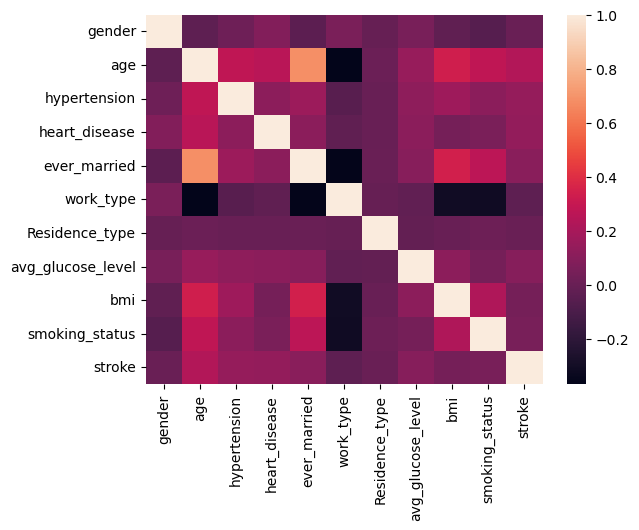

In [9]:
 # USING SEABORN FOR DATA VISUALIZATION
import seaborn as sns
sns.heatmap(a.corr())

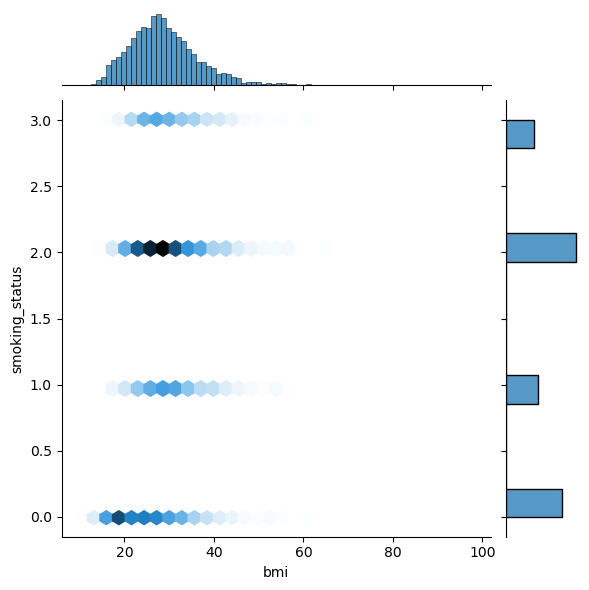

In [10]:
#JOINTPLOT
sns.jointplot(x='bmi',y='smoking_status',data=a,kind='hex')

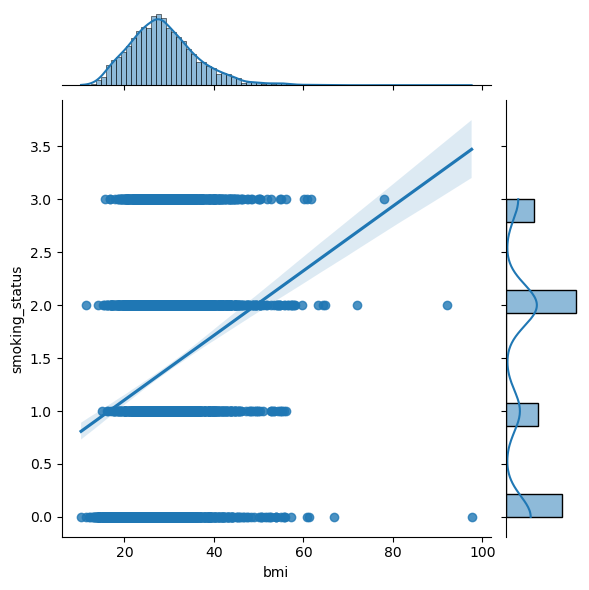

In [11]:
sns.jointplot(x='bmi',y='smoking_status',data=a,kind='reg')

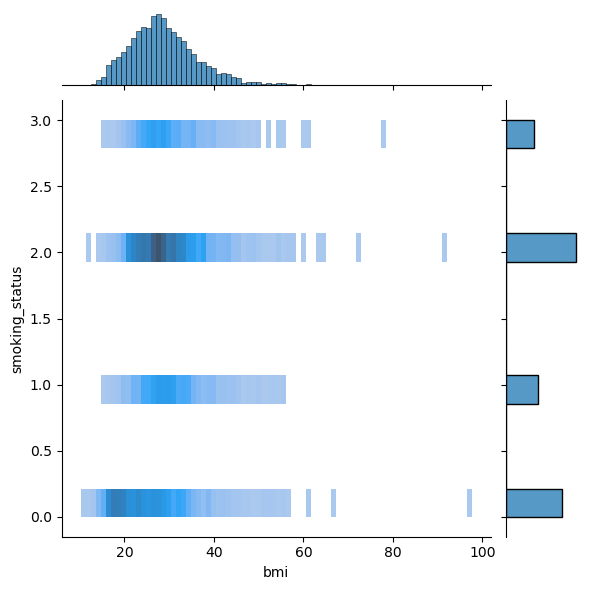

In [12]:
sns.jointplot(x='bmi',y='smoking_status',data=a,kind='hist')

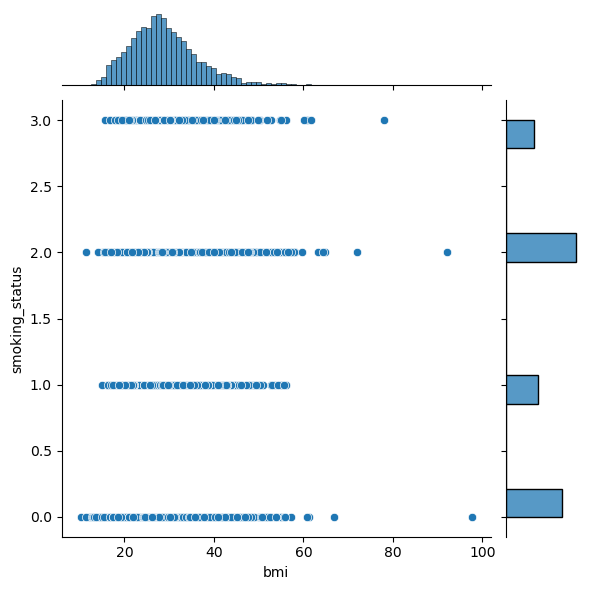

In [13]:
sns.jointplot(x='bmi',y='smoking_status',data=a,kind='scatter')

In [ ]:
#PAIRPLOT

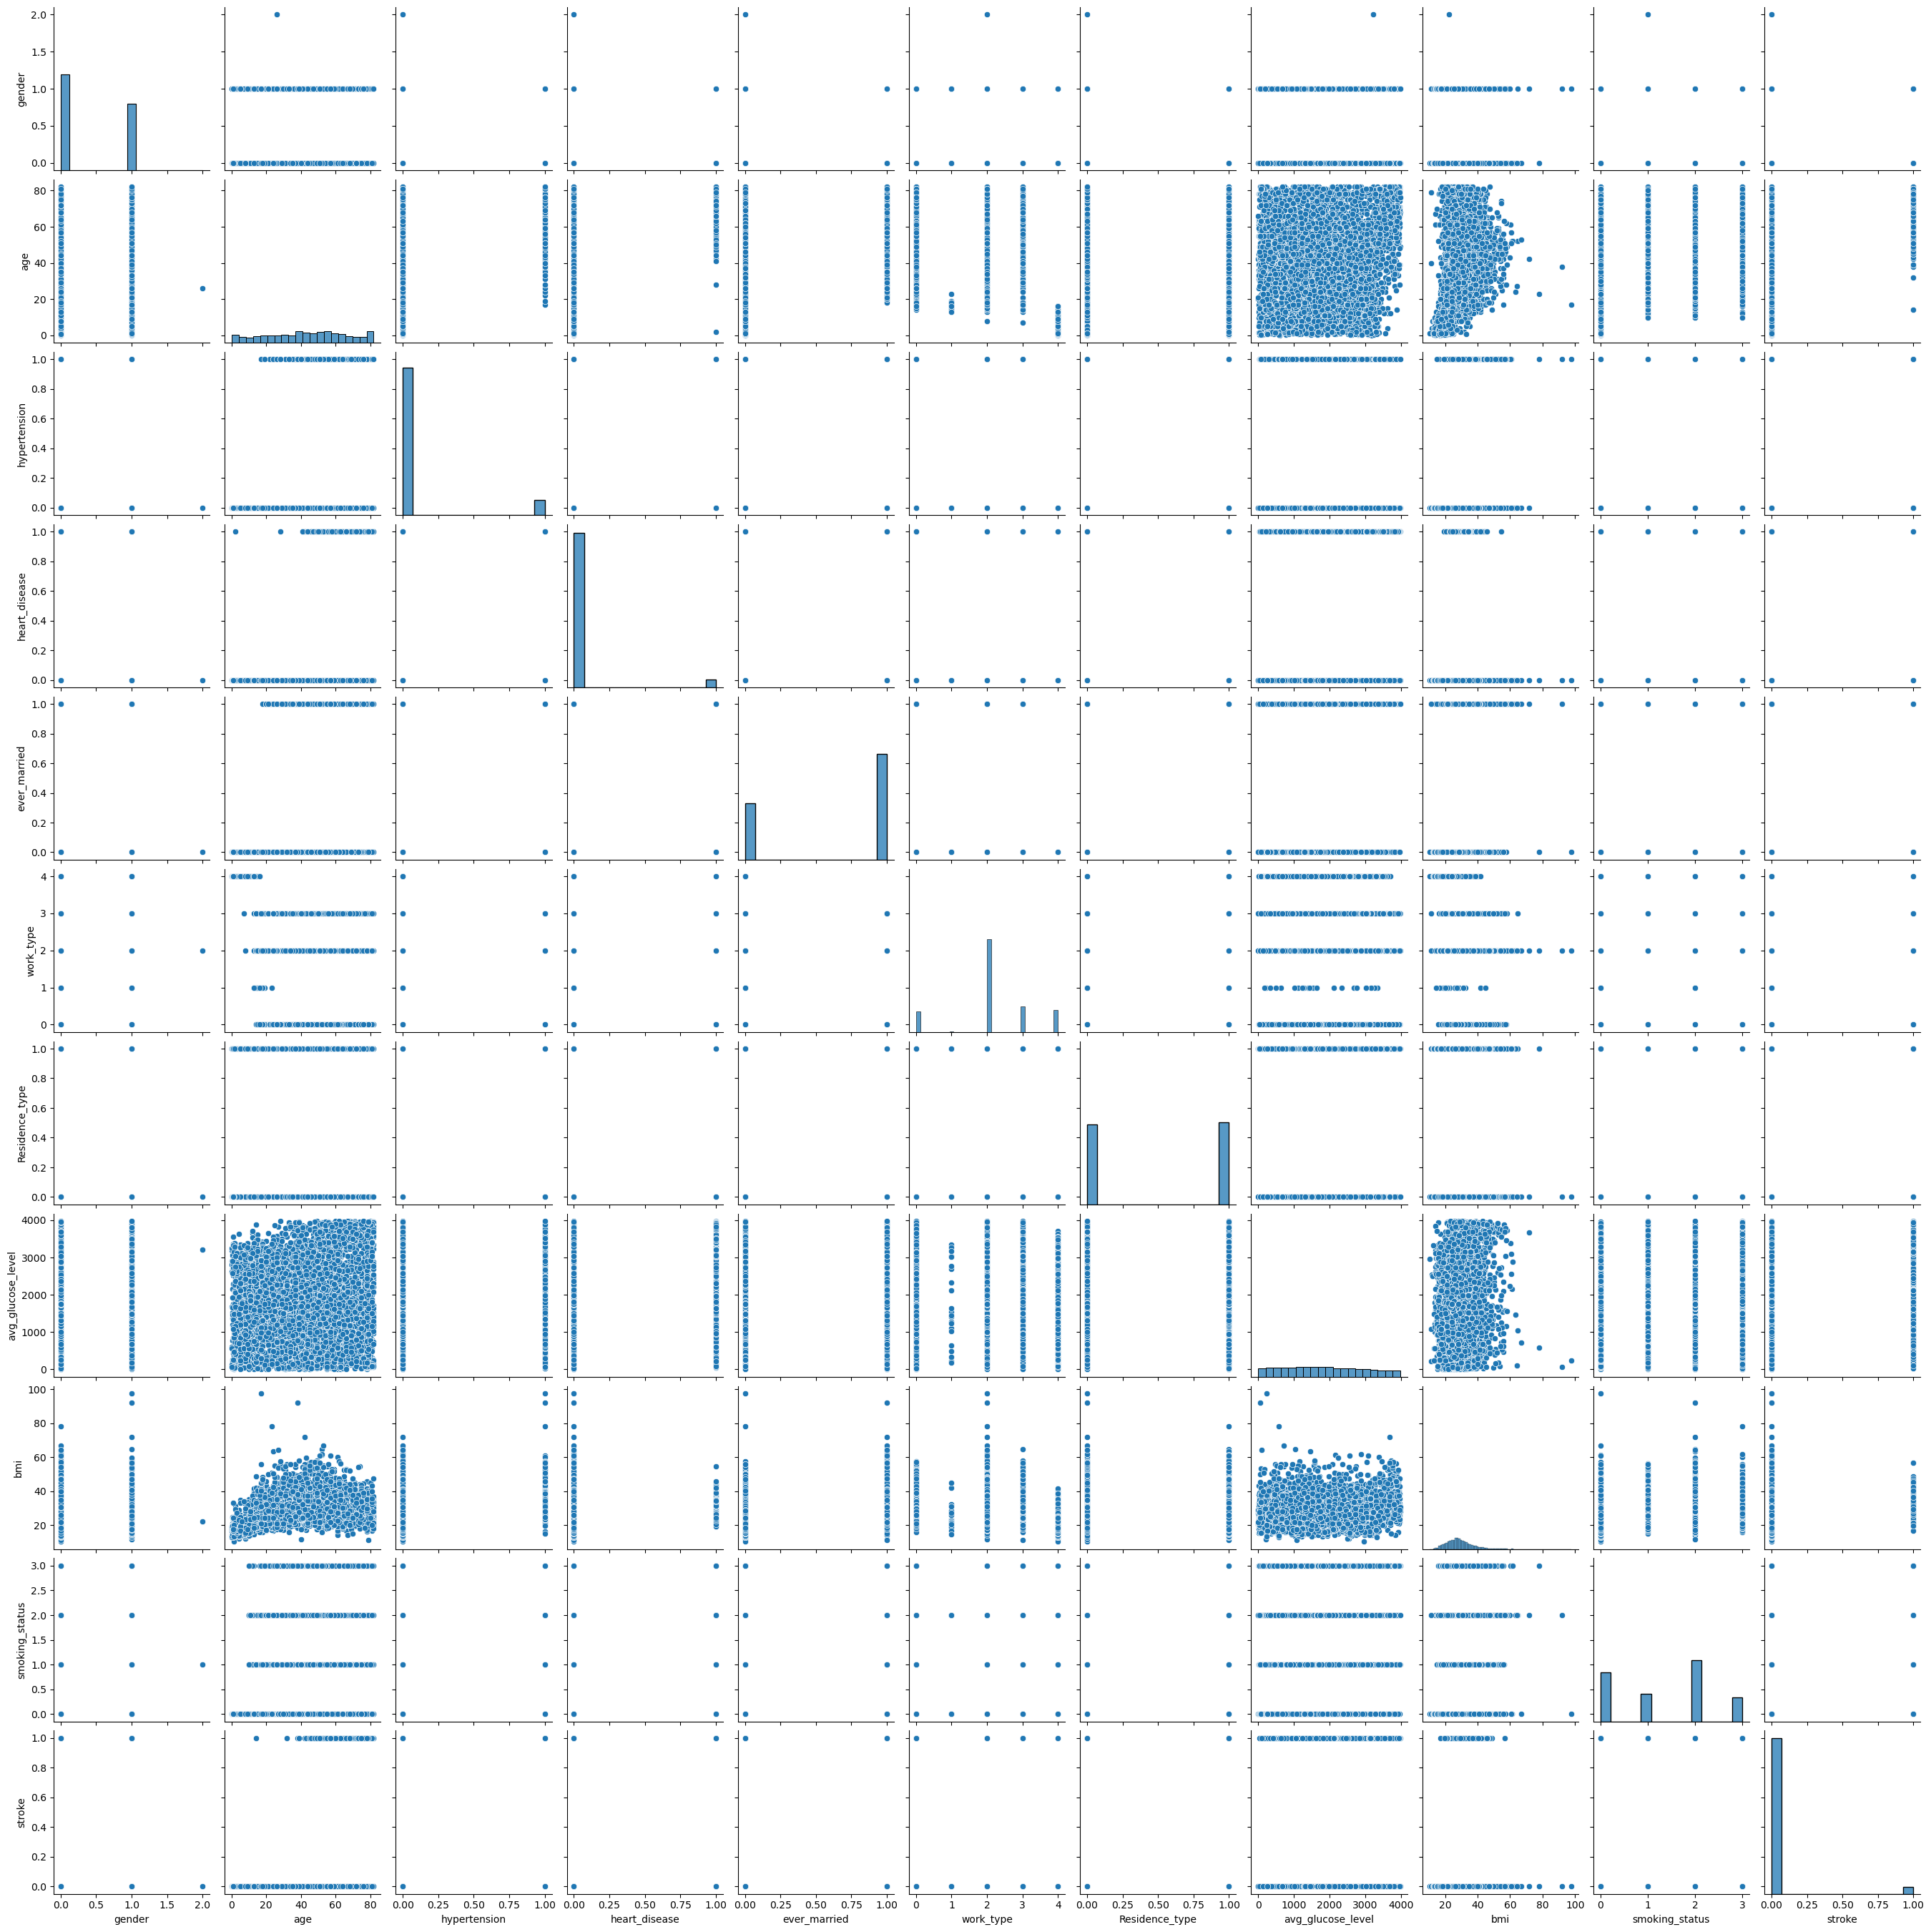

In [14]:
sns.pairplot(a)

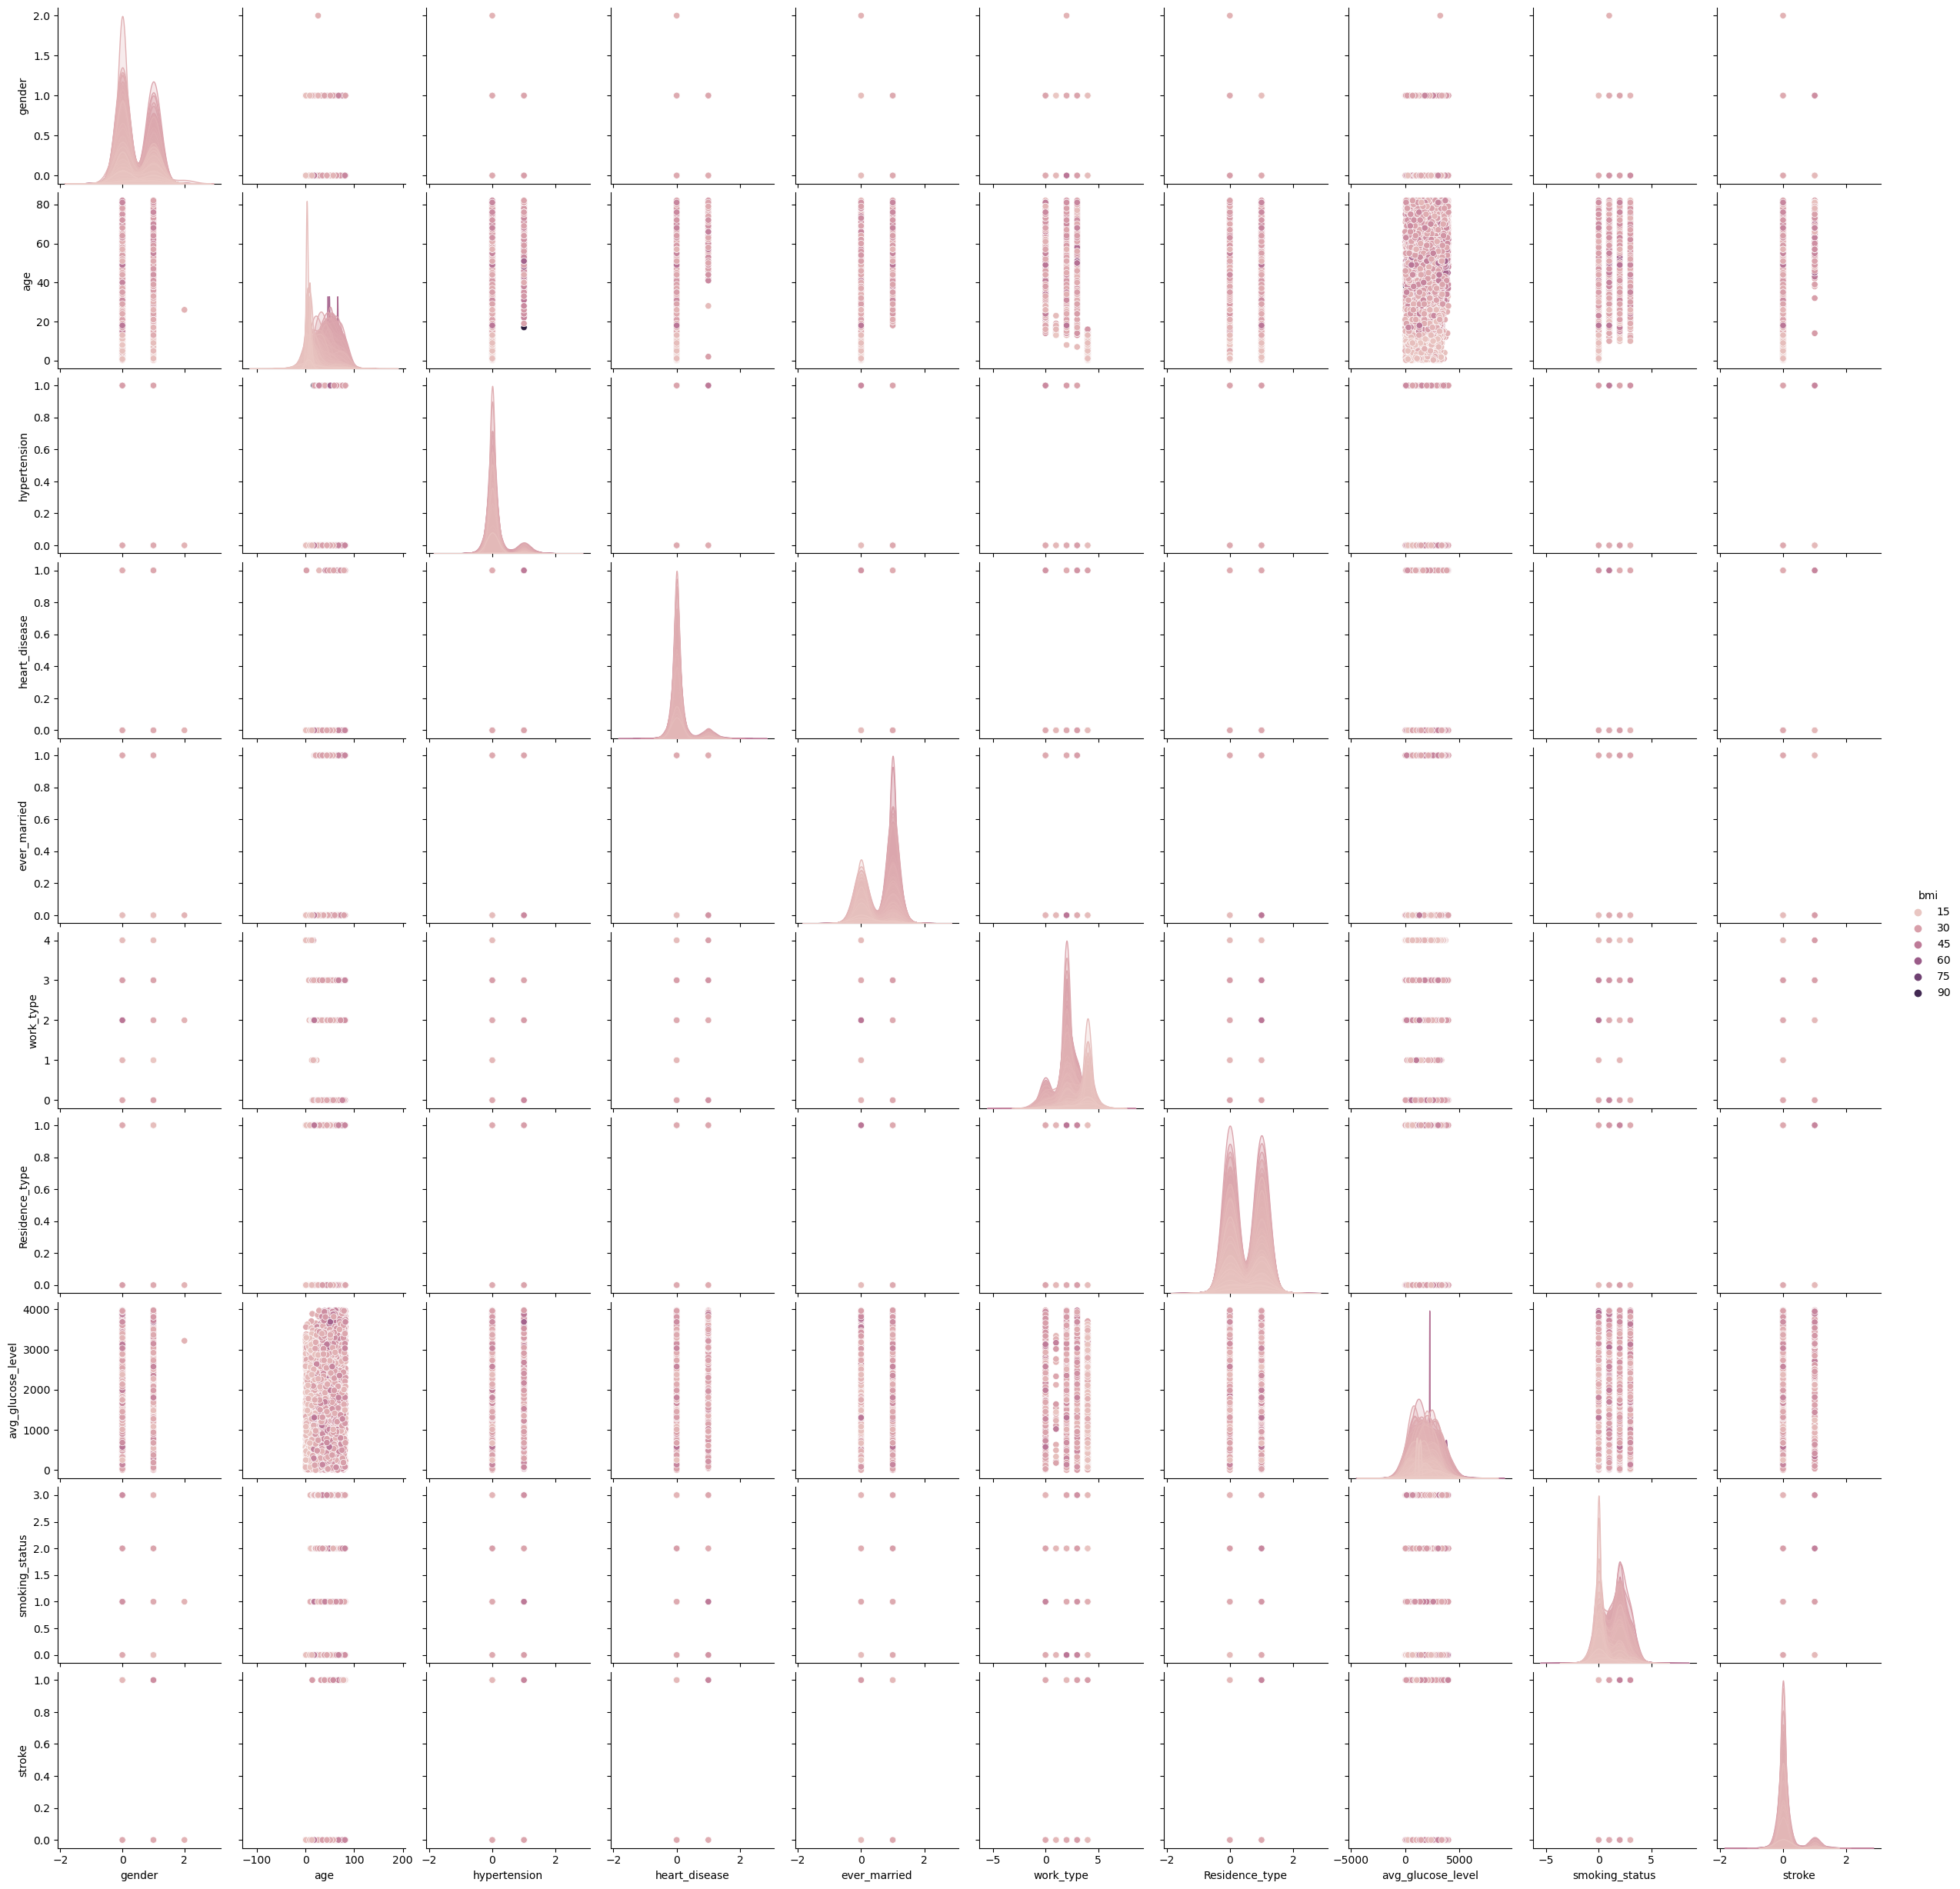

In [15]:
sns.pairplot(a,hue='bmi')

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

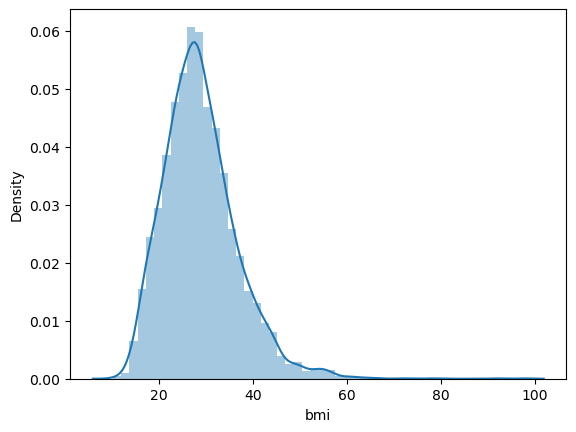

In [16]:
sns.distplot(a['bmi'])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi'>

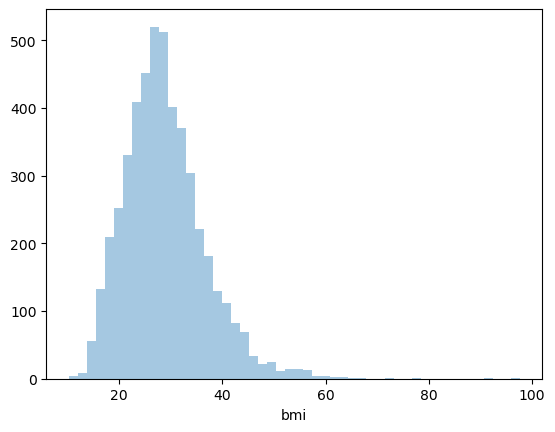

In [17]:
sns.distplot(a['bmi'],kde=False)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='count'>

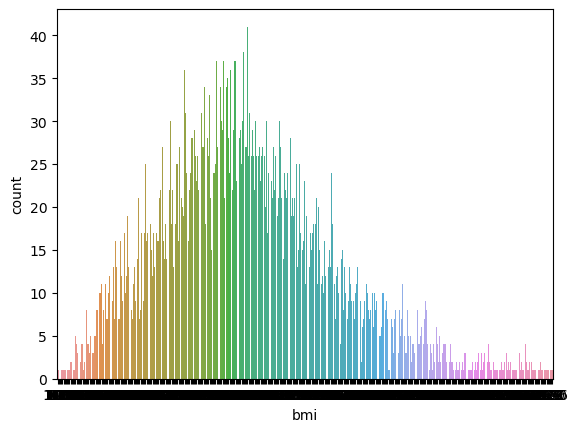

In [18]:
#CATEGORICAL PLOT
sns.countplot('bmi',data=a)

<AxesSubplot:xlabel='count', ylabel='bmi'>

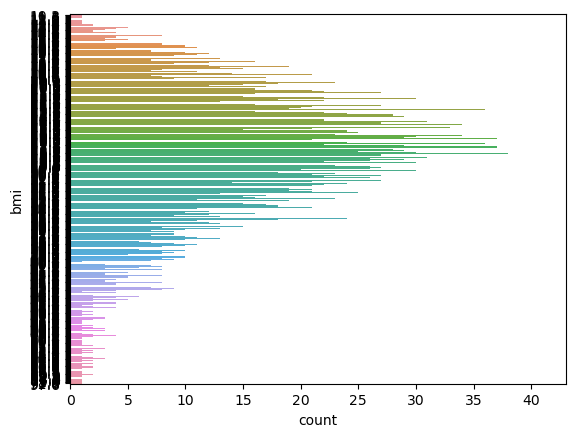

In [19]:
sns.countplot(y='bmi',data=a)

<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

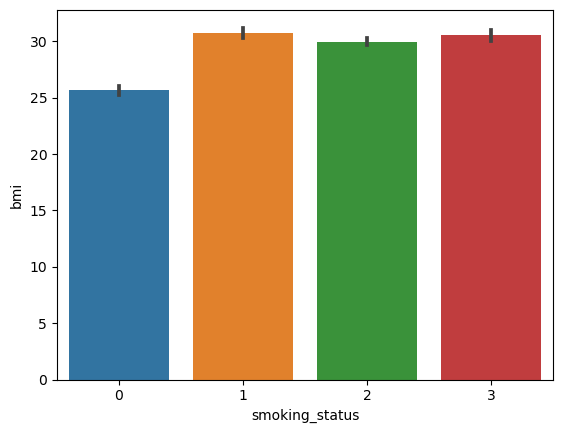

In [20]:
#BAR PLOT
sns.barplot(x='smoking_status',y='bmi',data=a)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

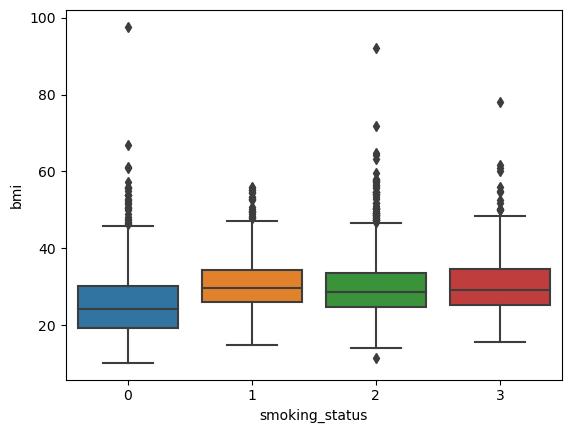

In [21]:
#BOX PLOT
sns.boxplot('smoking_status','bmi',data=a)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

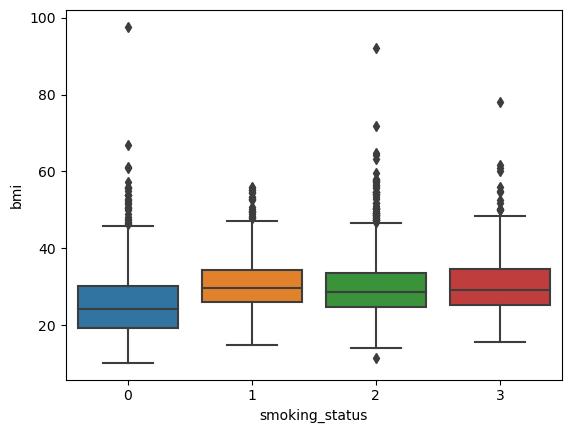

In [23]:
sns.boxplot('smoking_status','bmi',data=a)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

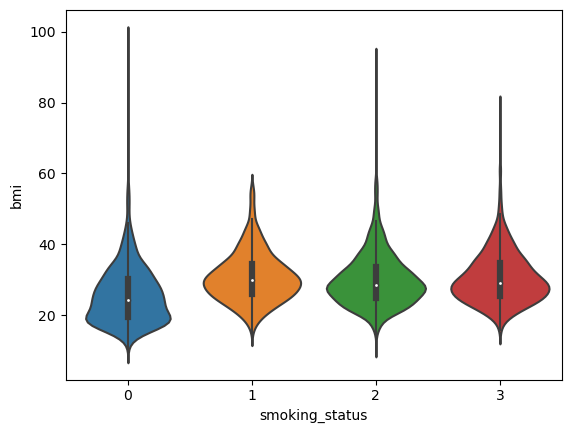

In [24]:
#VIOLIN PLOT
sns.violinplot('smoking_status','bmi',data=a)

In [ ]:
#TEST TRAIN TEST

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [26]:
#NAIVES BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
n=GaussianNB()
n.fit(x_train,y_train)

GaussianNB()

In [27]:
p=n.predict(x_test)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn import metrics
ab=metrics.accuracy_score(y_test,p)
ab

0.8766035430665852

In [29]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
p=dtc.predict(x_test)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn import metrics
cd=metrics.accuracy_score(y_test,p)
cd

0.918142944410507

In [32]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=7,random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [33]:
p=rfc.predict(x_test)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn import metrics
ef=metrics.accuracy_score(y_test,p)
ef

0.9535736102626756

In [35]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=0)
lgr.fit(x_train,y_train)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
p=lgr.predict(x_test)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn import metrics
gh=metrics.accuracy_score(y_test,p)
gh

0.9590714722052535

In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
alp=KNeighborsClassifier(n_neighbors=5)
alp.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
p=alp.predict(x_test)
p

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn import metrics
kl=metrics.accuracy_score(y_test,p)
kl

0.9584605986560782

,Models,Accuracy Score
3,Logistic Regression,0.959071
4,K Neighbor,0.958461
2,Random Forest Classification,0.953574
1,Decision Tree Classification,0.918143
0,Naive Bayes Classification,0.876604


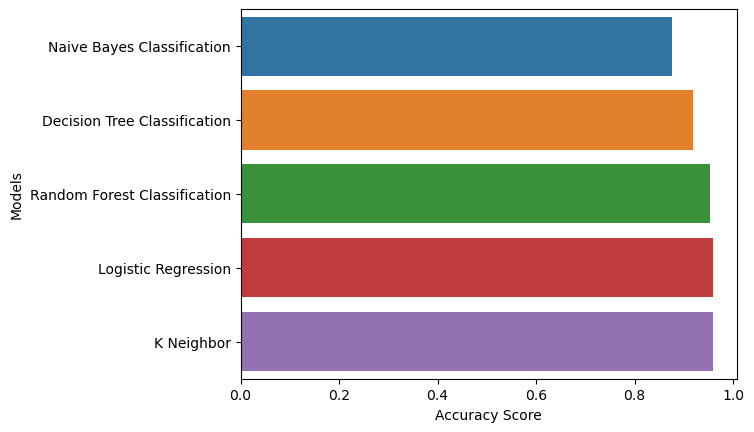

In [41]:
df=pd.DataFrame({
    "Models":["Naive Bayes Classification","Decision Tree Classification","Random Forest Classification","Logistic Regression","K Neighbor"],
    "Accuracy Score":[ab,cd,ef,gh,kl]
})

import seaborn as sns
sns.barplot(y="Models",x="Accuracy Score",data=df)
df.sort_values(by="Accuracy Score",ascending=False)

In [ ]:
#CONCLUSION FOR THE PROJECT

* Initially we use the library pandas to read the strock prediction analysis dataset
* After that use the library seaborn for visualizing the data to get the plots such as joinplot, pairplot, distplot, categorical plot, box plot and violin plot
* Then recognize the dataset is classification algorithm because we have the discrete values.
* Then use all the algorithms such as Naive Bayes, KNN, Logistic Regression, Decision Tree and Random Forest classification
* Here by using redictionas for all the algorithms, tthe best accuracy found out in Logistic Regression
* Therefore, Logistic Regression seems to be the kind of model suitable for predicting whether one has strock or not